
API stands for Application Programming Interface. It is a set of protocols, routines, and tools that allow different software applications to communicate and exchange data with each other. APIs provide a way for developers to access the functionality of another piece of software (such as a web service) and use it in their own applications.

In [50]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '041bb866-6ec8-4124-968d-2b066ec1e99c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-11T05:55:40.776Z', 'error_code': 0, 'error_message': None, 'elapsed': 45, 'credit_count': 1, 'notice': None, 'total_count': 10052}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11106, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [13]:
type(data)

dict

In [36]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [51]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16452\310854669.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']=pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11106,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971073e+07,1.971073e+07,False,NaN,1,NaN,NaN,None,2024-06-11T05:54:00.000Z,67670.548347,2.839352e+10,97.5142,-0.512068,-2.689487,-1.897035,10.936423,-4.718207,-6.278601,1.333836e+12,54.1562,1.421082e+12,None,2024-06-11T05:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 05:55:45.441601
1,1027,Ethereum,ETH,ethereum,9055,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201557e+08,1.201557e+08,True,NaN,2,NaN,NaN,None,2024-06-11T05:53:00.000Z,3551.119590,1.463147e+10,83.6455,-0.331713,-3.562155,-5.666083,21.421513,0.200847,-12.101623,4.266872e+11,17.3209,4.266872e+11,None,2024-06-11T05:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 05:55:45.441601
2,825,Tether USDt,USDT,tether,88181,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.124963e+11,1.150861e+11,True,NaN,3,NaN,NaN,None,2024-06-11T05:53:00.000Z,0.999581,6.521791e+10,68.1995,-0.003019,-0.021968,0.005242,0.000472,-0.041504,-0.076154,1.124491e+11,4.5656,1.150379e+11,None,2024-06-11T05:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-11 05:55:45.441601
3,1839,BNB,BNB,bnb,2179,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.476276e+08,1.476276e+08,False,NaN,4,NaN,NaN,None,2024-06-11T05:53:00.000Z,616.930659,3.619311e+09,98.9557,-0.320425,-7.125159,-2.421353,4.431785,0.011683,14.452315,9.107599e+10,3.6979,9.107599e+10,None,2024-06-11T05:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 05:55:45.441601
4,5426,Solana,SOL,solana,679,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.609507e+08,5.778608e+08,True,NaN,5,NaN,NaN,None,2024-06-11T05:53:00.000Z,153.883682,2.408426e+09,75.7160,-0.155127,-3.718509,-7.182299,4.402196,-11.991020,1.202270,7.093280e+10,2.8800,8.892335e+10,None,2024-06-11T05:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 05:55:45.441601
5,3408,USDC,USDC,usd-coin,19679,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.208801e+10,3.208801e+10,False,NaN,6,NaN,NaN,None,2024-06-11T05:53:00.000Z,1.000039,6.198593e+09,136.6036,0.003463,0.005039,0.015346,0.004920,0.011446,0.012011,3.208927e+10,1.3029,3.208927e+10,None,2024-06-11T05:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-11 05:55:45.441601
6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.550616e+10,9.998755e+10,False,NaN,7,NaN,NaN,None,2024-06-11T05:54:00.000Z,0.486436,1.369093e+09,100.5077,-0.225594,-2.170018,-6.439860,-4.060822,-20.418535,-30.315653,2.700021e+10,1.0963,4.864364e+10,None,2024-06-11T05:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 05:55:45.441601
7,74,Dogecoin,DOGE,dogecoin,985,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.446606e+11,1.446606e+11,True,NaN,8,NaN,NaN,None,2024-06-11T05:54:00.000Z,0.140952,9.812135e+08,54.7163,-0.209831,-3.089648,-10.843624,-1.924556,-28.869540,-18.269551,2.039016e+10,0.8279,2.039016e+10,None,2024-06-11T05:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 05:55:45.441601
8,11419,Toncoin,TON,toncoin,392,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.4

In [52]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '041bb866-6ec8-4124-968d-2b066ec1e99c',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df=pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df 

    if not os.path.isfile(r"C:\Users\KIIT\OneDrive - kiit.ac.in\Desktop\data analystics\python\API.csv"):
        df.to_csv(r'C:\Users\KIIT\OneDrive - kiit.ac.in\Desktop\data analystics\python\API.csv',header='column_names')
    else:
         df.to_csv(r'C:\Users\KIIT\OneDrive - kiit.ac.in\Desktop\data analystics\python\API.csv',mode='a',header=False)


In [95]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Completed")
    sleep(5)
exit()    

{'status': {'timestamp': '2024-06-11T06:50:04.635Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 10056}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11106, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16452\3107891647.py:24: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']=pd.to_datetime('now')


KeyboardInterrupt: 

In [96]:
df=pd.read_csv(r"C:\Users\KIIT\OneDrive - kiit.ac.in\Desktop\data analystics\python\API.csv")

In [56]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11105,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.971042e+07,1.971042e+07,False,NaN,1,NaN,NaN,NaN,2024-06-10T16:02:00.000Z,70008.545882,1.759475e+10,36.9800,0.565056,0.686765,0.601921,14.504679,-0.040352,-2.432633,1.379898e+12,53.9494,1.470179e+12,NaN,2024-06-10T16:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-10 16:03:17.208214
1,1,1027,Ethereum,ETH,ethereum,9054,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201542e+08,1.201542e+08,True,NaN,2,NaN,NaN,NaN,2024-06-10T16:01:00.000Z,3702.024954,9.496111e+09,20.2807,0.628031,0.271080,-2.501729,26.528684,5.561417,-7.246979,4.448137e+11,17.3907,4.448137e+11,NaN,2024-06-10T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-10 16:03:17.208214
2,2,825,Tether USDt,USDT,tether,88152,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.124810e+11,1.150861e+11,True,NaN,3,NaN,NaN,NaN,2024-06-10T16:01:00.000Z,0.999869,4.570510e+10,16.0824,0.026079,-0.027941,-0.008659,0.031873,-0.000336,-0.013786,1.124662e+11,4.3971,1.150710e+11,NaN,2024-06-10T16:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-10 16:03:17.208214
3,3,1839,BNB,BNB,bnb,2179,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475845e+08,1.475845e+08,False,NaN,4,NaN,NaN,NaN,2024-06-10T16:01:00.000Z,651.100294,2.565804e+09,38.3219,0.765165,-3.844646,3.725705,10.081190,8.043743,20.088620,9.609232e+10,3.7587,9.609232e+10,NaN,2024-06-10T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-10 16:03:17.208214
4,4,5426,Solana,SOL,solana,679,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.607834e+08,5.778661e+08,True,NaN,5,NaN,NaN,NaN,2024-06-10T16:01:00.000Z,162.490083,1.587535e+09,0.3762,1.655944,0.490658,-1.429135,11.591832,-6.251225,7.985321,7.487273e+10,2.9273,9.389750e+10,NaN,2024-06-10T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-10 16:03:17.208214
5,5,3408,USDC,USDC,usd-coin,19666,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.214991e+10,3.214991e+10,False,NaN,6,NaN,NaN,NaN,2024-06-10T16:01:00.000Z,1.000074,4.169830e+09,69.2733,0.016803,-0.015023,0.007082,0.013420,0.005704,0.015983,3.215228e+10,1.2575,3.215228e+10,NaN,2024-06-10T16:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-10 16:03:17.208214
6,6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.550616e+10,9.998755e+10,False,NaN,7,NaN,NaN,NaN,2024-06-10T16:02:00.000Z,0.504622,9.808500e+08,36.8913,0.364822,1.879283,-3.265644,-0.409678,-17.011839,-28.132094,2.800964e+10,1.0959,5.046222e+10,NaN,2024-06-10T16:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-10 16:03:17.208214
7,7,74,Dogecoin,DOGE,dogecoin,985,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.446522e+11,1.446522e+11,True,NaN,8,NaN,NaN,NaN,2024-06-10T16:02:00.000Z,0.147012,6.908085e+08,-4.7832,1.270833,0.085620,-8.855909,1.733100,-23.671446,-13.513181,2.126565e+10,0.8320,2.126565e+10,NaN,2024-06-10T16:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-10 16:03:17.208214
8,8,11419,Toncoin,TON,toncoin,392,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.43169

In [57]:
pd.set_option("display.float_format",lambda x: '%.5f' %x)

In [58]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11105,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19710418.00000,19710418.00000,False,NaN,1,NaN,NaN,NaN,2024-06-10T16:02:00.000Z,70008.54588,17594750377.83412,36.98000,0.56506,0.68676,0.60192,14.50468,-0.04035,-2.43263,1379897702912.82251,53.94940,1470179463528.84009,NaN,2024-06-10T16:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-10 16:03:17.208214
1,1,1027,Ethereum,ETH,ethereum,9054,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120154167.90866,120154167.90866,True,NaN,2,NaN,NaN,NaN,2024-06-10T16:01:00.000Z,3702.02495,9496110756.53652,20.28070,0.62803,0.27108,-2.50173,26.52868,5.56142,-7.24698,444813727933.94647,17.39070,444813727933.95001,NaN,2024-06-10T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-10 16:03:17.208214
2,2,825,Tether USDt,USDT,tether,88152,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112480965357.26971,115086088089.34978,True,NaN,3,NaN,NaN,NaN,2024-06-10T16:01:00.000Z,0.99987,45705097742.69351,16.08240,0.02608,-0.02794,-0.00866,0.03187,-0.00034,-0.01379,112466177177.50146,4.39710,115070957406.98000,NaN,2024-06-10T16:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-10 16:03:17.208214
3,3,1839,BNB,BNB,bnb,2179,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147584514.76406,147584514.76406,False,NaN,4,NaN,NaN,NaN,2024-06-10T16:01:00.000Z,651.10029,2565803839.61416,38.32190,0.76517,-3.84465,3.72571,10.08119,8.04374,20.08862,96092320952.43391,3.75870,96092320952.42999,NaN,2024-06-10T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-10 16:03:17.208214
4,4,5426,Solana,SOL,solana,679,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,460783376.55337,577866059.62947,True,NaN,5,NaN,NaN,NaN,2024-06-10T16:01:00.000Z,162.49008,1587535336.58493,0.37620,1.65594,0.49066,-1.42914,11.59183,-6.25122,7.98532,74872728943.41368,2.92730,93897503794.23000,NaN,2024-06-10T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-10 16:03:17.208214
5,5,3408,USDC,USDC,usd-coin,19666,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32149912637.90162,32149912637.90162,False,NaN,6,NaN,NaN,NaN,2024-06-10T16:01:00.000Z,1.00007,4169830290.22374,69.27330,0.01680,-0.01502,0.00708,0.01342,0.00570,0.01598,32152278930.16474,1.25750,32152278930.16000,NaN,2024-06-10T16:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-10 16:03:17.208214
6,6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55506158411.00000,99987553871.00000,False,NaN,7,NaN,NaN,NaN,2024-06-10T16:02:00.000Z,0.50462,980850005.58533,36.89130,0.36482,1.87928,-3.26564,-0.40968,-17.01184,-28.13209,28009640763.88044,1.09590,50462221788.94000,NaN,2024-06-10T16:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-10 16:03:17.208214
7,7,74,Dogecoin,DOGE,dogecoin,985,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144652206383.70520,144652206383.70520,True,NaN,8,NaN,NaN,NaN,2024-06-10T16:02:00.000Z,0.14701,690808453.46121,-4.78320,1.27083,0.08562,-8.85591,1.73310,-23.67145,-13.51318,21265645942.57479,0.83200,21265645942.57000,NaN,2024-06-10T16:02:00.000Z,NaN,NaN

In [61]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.56506,0.68676,0.60192,14.50468,-0.04035,-2.43263
Ethereum,0.62803,0.27108,-2.50173,26.52868,5.56142,-7.24698
Tether USDt,0.02608,-0.02794,-0.00866,0.03187,-0.00034,-0.01379
BNB,0.76517,-3.84465,3.72571,10.08119,8.04374,20.08862
Solana,1.65594,0.49066,-1.42914,11.59183,-6.25122,7.98532
USDC,0.01680,-0.01502,0.00708,0.01342,0.00570,0.01598
XRP,0.36482,1.87928,-3.26564,-0.40968,-17.01184,-28.13209
Dogecoin,1.27083,0.08562,-8.85591,1.73310,-23.67145,-13.51318
Toncoin,0.45329,1.29082,8.21583,5.45579,-1.24956,97.61424


In [62]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.56506
             quote.USD.percent_change_24h     0.68676
             quote.USD.percent_change_7d      0.60192
             quote.USD.percent_change_30d    14.50468
             quote.USD.percent_change_60d    -0.04035
             quote.USD.percent_change_90d    -2.43263
Ethereum     quote.USD.percent_change_1h      0.62803
             quote.USD.percent_change_24h     0.27108
             quote.USD.percent_change_7d     -2.50173
             quote.USD.percent_change_30d    26.52868
             quote.USD.percent_change_60d     5.56142
             quote.USD.percent_change_90d    -7.24698
Tether USDt  quote.USD.percent_change_1h      0.02608
             quote.USD.percent_change_24h    -0.02794
             quote.USD.percent_change_7d     -0.00866
             quote.USD.percent_change_30d     0.03187
             quote.USD.percent_change_60d    -0.00034
             quote.USD.percent_change_90

In [63]:
type(df4)

pandas.core.series.Series

In [64]:
df5=df4.to_frame(name='Values')
df5

Values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.56506
            quote.USD.percent_change_24h   0.68676
            quote.USD.percent_change_7d    0.60192
            quote.USD.percent_change_30d  14.50468
            quote.USD.percent_change_60d  -0.04035
            quote.USD.percent_change_90d  -2.43263
Ethereum    quote.USD.percent_change_1h    0.62803
            quote.USD.percent_change_24h   0.27108
            quote.USD.percent_change_7d   -2.50173
            quote.USD.percent_change_30d  26.52868
            quote.USD.percent_change_60d   5.56142
            quote.USD.percent_change_90d  -7.24698
Tether USDt quote.USD.percent_change_1h    0.02608
            quote.USD.percent_change_24h  -0.02794
            quote.USD.percent_change_7d   -0.00866
            quote.USD.percent_change_30d   0.03187
            quote.USD.percent_change_60d  -0.00034
            quote.USD.percent_change_90d  -0.01379
BNB         quote.USD.percent_change_1h    0.76517
            quote.USD.percent_change_24h  -3.84465
            quote.USD.percent_change_7d    3.72571
            quote.USD.percent_change_30d  10.08119
            quote.USD.percent_change_60d   8.04374
            quote.USD.percent_change_90d  20.08862
Solana      quote.USD.percent_change_1h    1.65594
            quote.USD.percent_change_24h   0.49066
            quote.USD.percent_change_7d   -1.42914
            quote.USD.percent_change_30d  11.59183
            quote.USD.percent_change_60d  -6.25122
            quote.USD.percent_change_90d   7.98532
USDC        quote.USD.percent_change_1h    0.01680
            quote.USD.percent_change_24h  -0.01502
            quote.USD.percent_change_7d    0.00708
            quote.USD.percent_change_30d   0.01342
            quote.USD.percent_change_60d   0.00570
            quote.USD.percent_change_90d   0.01598
XRP         quote.USD.percent_change_1h    0.36482
            quote.USD.percent_change_24h   1.87928
            quote.USD.percent_change_7d   -3.26564
            quote.USD.percent_change_30d  -0.40968
            quote.USD.percent_change_60d -17.01184
            quote.USD.percent_change_90d -28.13209
Dogecoin    quote.USD.percent_change_1h    1.27083
            quote.USD.percent_change_24h   0.08562
            quote.USD.percent_change_7d   -8.85591
            quote.USD.percent_change_30d   1.73310
            quote.USD.percent_change_60d -23.67145
            quote.USD.percent_change_90d -13.51318
Toncoin     quote.USD.percent_change_1h    0.45329
            quote.USD.percent_change_24h   1.29082
            quote.USD.percent_change_7d    8.21583
            quote.USD.percent_change_30d   5.45579
            quote.USD.percent_change_60d  -1.24956
            quote.USD.percent_change_90d  97.61424
Cardano     quote.USD.percent_change_1h    1.12730
            quote.USD.percent_change_24h   1.74873
            quote.USD.percent_change_7d   -1.18600
            quote.USD.percent_change_30d   0.92509
            quote.USD.percent_change_60d -23.05897
            quote.USD.percent_change_90d -40.10007
Shiba Inu   quote.USD.percent_change_1h    1.31775
            quote.USD.percent_change_24h   0.58855
            quote.USD.percent_change_7d   -5.76078
            quote.USD.percent_change_30d   3.22800
            quote.USD.percent_change_60d -14.52405
            quote.USD.percent_change_90d -27.52544
Avalanche   quote.USD.percent_change_1h    1.06300
            quote.USD.percent_change_24h   1.55436
            quote.USD.percent_change_7d   -7.40364
            quote.USD.percent_change_30d  -2.30867
            quote.USD.percent_change_60d -28.37170
            quote.USD.percent_change_90d -38.69184
TRON        quote.USD.percent_change_1h    0.25783
            quote.USD.percent_change_24h   0.47498
            quote.USD.percent_change_7d    3.39977
            quote.USD.percent_change_30d  -7.04922
            quote.USD.percent_change_60d  -1.85024
            quo

In [65]:
index=pd.Index(range(90))

In [70]:
df6=df5.reset_index()

In [72]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,0.56506
1,Bitcoin,quote.USD.percent_change_24h,0.68676
2,Bitcoin,quote.USD.percent_change_7d,0.60192
3,Bitcoin,quote.USD.percent_change_30d,14.50468
4,Bitcoin,quote.USD.percent_change_60d,-0.04035
5,Bitcoin,quote.USD.percent_change_90d,-2.43263
6,Ethereum,quote.USD.percent_change_1h,0.62803
7,Ethereum,quote.USD.percent_change_24h,0.27108
8,Ethereum,quote.USD.percent_change_7d,-2.50173
9,Ethereum,quote.USD.percent_change_30d,26.52868


In [85]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_24h'],['24h'])
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_7d'],['7d'])
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_30d'],['30d'])
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_60d'],['60d'])
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_90d'],['90d'])
df7

,name,percent_change,Values
0,Bitcoin,1h,0.56506
1,Bitcoin,24h,0.68676
2,Bitcoin,7d,0.60192
3,Bitcoin,30d,14.50468
4,Bitcoin,60d,-0.04035
5,Bitcoin,90d,-2.43263
6,Ethereum,1h,0.62803
7,Ethereum,24h,0.27108
8,Ethereum,7d,-2.50173
9,Ethereum,30d,26.52868


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

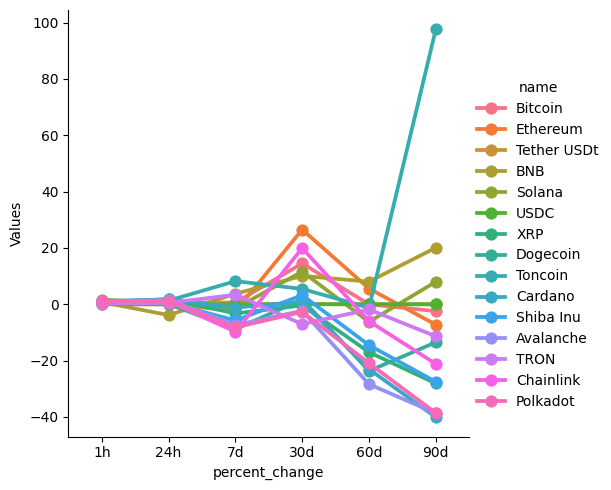

In [86]:
sns.catplot(x='percent_change',y='Values',hue='name',data=df7,kind='point')

In [92]:
df10=df[['name','quote.USD.price','timestamp']]
df10=df10[df10['name']=='Bitcoin']
df10

,name,quote.USD.price,timestamp
0,Bitcoin,70008.54588,2024-06-10 16:03:17.208214
15,Bitcoin,70008.54588,2024-06-10 16:03:23.638240
30,Bitcoin,70008.54588,2024-06-10 16:03:30.117448


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

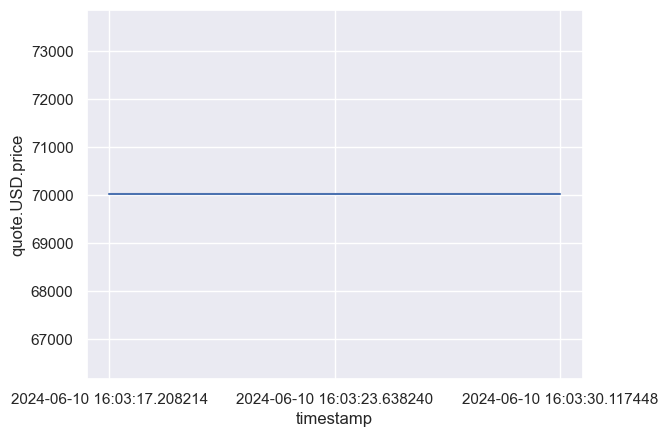

In [94]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price',data=df10)
